# Simple Linear Regression

A linear model creates a linear function based on the input features to make predictions.  
In linear regression, the regression coefficients are calculated using the method of least squares.

**Least Squares Method**: This method finds the regression coefficients that minimize the mean squared error between the predicted values and the actual target values (Y) in the training set.


In [29]:
# Import the relevant libraries
# For these lessons we will need NumPy, pandas, matplotlib 
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

## Load the data

In [30]:
# We start by loading the data
df = pd.read_csv('./data/1.01. Simple linear regression.csv')
# Let's explore the top 5 rows of the df
df.head()

,SAT,GPA
0,1714,2.40
1,1664,2.52
2,1760,2.54
3,1685,2.74
4,1693,2.83


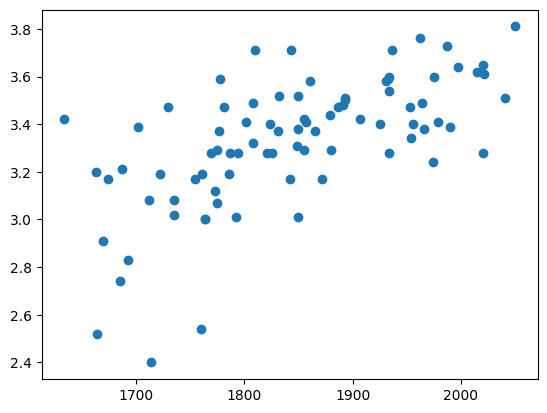

In [31]:
plt.plot(df['SAT'], df['GPA'], 'o')

<Axes: xlabel='SAT', ylabel='GPA'>

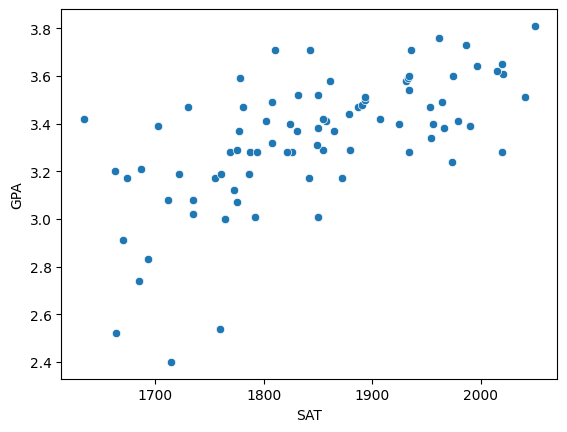

In [32]:
sns.scatterplot(x ='SAT', y='GPA', data=df)

Text(0, 0.5, 'GPA')

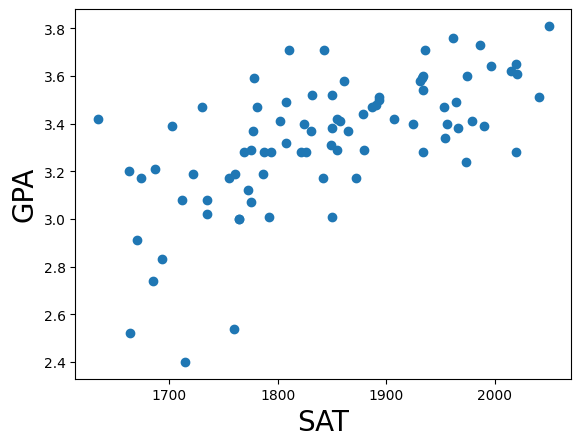

In [33]:
plt.plot(df['SAT'], df['GPA'], 'o')
plt.xlabel('SAT', fontsize = 20)
plt.ylabel('GPA', fontsize = 20)

## Create the regression

### Declare the dependent and independent variables

In [34]:
# There is a single independent variable: 'SAT'
x = df['SAT']
# and a single depended variable: 'GPA'
y = df['GPA']

In [35]:
x # this is wrong form to use

0     1714
1     1664
2     1760
3     1685
4     1693
      ... 
79    1936
80    1810
81    1987
82    1962
83    2050
Name: SAT, Length: 84, dtype: int64

In [36]:
x_matrix = x.values.reshape(-1, 1)
x_matrix

array([[1714],
       [1664],
       [1760],
       [1685],
       [1693],
       [1670],
       [1764],
       [1764],
       [1792],
       [1850],
       [1735],
       [1775],
       [1735],
       [1712],
       [1773],
       [1872],
       [1755],
       [1674],
       [1842],
       [1786],
       [1761],
       [1722],
       [1663],
       [1687],
       [1974],
       [1826],
       [1787],
       [1821],
       [2020],
       [1794],
       [1769],
       [1934],
       [1775],
       [1855],
       [1880],
       [1849],
       [1808],
       [1954],
       [1777],
       [1831],
       [1865],
       [1850],
       [1966],
       [1702],
       [1990],
       [1925],
       [1824],
       [1956],
       [1857],
       [1979],
       [1802],
       [1855],
       [1907],
       [1634],
       [1879],
       [1887],
       [1730],
       [1953],
       [1781],
       [1891],
       [1964],
       [1808],
       [1893],
       [2041],
       [1893],
       [1832],
       [18

In [37]:
# scikit learn 에서 데이터를 입력으로 사용하기 위해서는 2D 배열을 사용해야 한다.
x_matrix = x.values.reshape(-1,1)

# Check the shape just in case
x_matrix.shape

(84, 1)

### Creating a Regression Model

To create a simple linear regression model, you can use the `LinearRegression` class from `sklearn.linear_model`.

Reference: [LinearRegression documentation](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html)

In this example, we use the `LinearRegression` module from `sklearn.linear_model` to create a regression model and fit it to the data using the method of least squares.

```python
# Import the necessary library
from sklearn.linear_model import LinearRegression

# Create a linear regression object
reg = LinearRegression()

# Fit the linear regression model using the least squares method
# The first argument is the independent variable (features), and the second is the dependent variable (target)
reg.fit(x_matrix, y)

# Display the coefficients and intercept of the fitted regression line
print("Coefficients:", reg.coef_)
print("Intercept:", reg.intercept_)


In [38]:
# and of course the actual regression (machine learning) module
from sklearn.linear_model import LinearRegression
# We start by creating a linear regression object
reg = LinearRegression()
reg.fit(x_matrix, y) # first arg: independent var, seoncd arg dependent var

LinearRegression()

### R-squared

The explanatory power of a model can be evaluated using the **R-squared (coefficient of determination)**.  
- **R-squared** measures how well the model explains the variance in the dependent variable.
- An R-squared value close to 1 indicates a model with good explanatory power.


#### In Code:
```python
# Calculate R-squared using the score() method
r_squared = reg.score(x_matrix, y)
print("R-squared:", r_squared)


In [39]:
# To get the R-squared in sklearn we must call the appropriate method
reg.score(x_matrix,y)

0.40600391479679754

### Coefficients

Regression coefficients represent the change in the dependent variable (\(y\)) for a one-unit change in the independent variable (\(x\)), holding all other variables constant.

#### Interpretation of Coefficients
The regression coefficient (\(\beta_i\)) indicates how much \(y\) changes when \(x_i\) increases by 1 unit.  
For example, if the regression coefficient for SAT is \(0.00167769\), it means that when SAT increases by 1 unit, GPA increases by approximately \(0.00167769\).

#### In Code:
```python
# Display regression coefficients
print("Coefficients:", reg.coef_)


In [40]:
# Getting the coefficients of the regression
# Note that the output is an array, as we usually expect several coefficients
reg.coef_

array([0.00165569])

### Intercept

In [41]:
# Getting the intercept of the regression
# Note that the result is a float as we usually expect a single value
reg.intercept_

0.2750402996602799

### Making predictions

In [42]:
# There is a dedicated method should we want to predict values
# Note that the result is an array, as we can predict more than one value at a time
reg.predict([[1740]])

array([3.15593751])

In [43]:
# To be in line with our knowledge so far, we can create a pandas data frame with several different values of SAT
new_data = pd.DataFrame(data=[1740,1760],columns=['SAT'])
new_data

,SAT
0,1740
1,1760


In [44]:
# We can predict the whole data frame in bulk
# Note that the result is an array, this time with 2 elements
reg.predict(new_data)

array([3.15593751, 3.18905127])

In [45]:
# Finally, we can directly store the predictions in a new series of the same dataframe
new_data['Predicted_GPA'] = reg.predict(new_data)
new_data

,SAT,Predicted_GPA
0,1740,3.155938
1,1760,3.189051


### Plotting the Regression Line on a Scatter Plot

To visualize the regression model, we can plot the regression line along with the scatter plot of the data points.

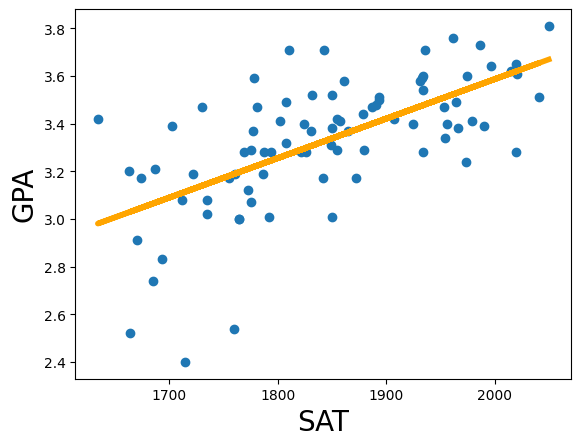

In [46]:
# There are different ways to plot the data - here's the matplotlib code
plt.scatter(x,y)

# Parametrized version of the regression line
yhat = reg.coef_*x_matrix + reg.intercept_  # y = a*x + b

# Plotting the regression line
fig = plt.plot(x, yhat, lw=4, c='orange', label ='regression line')

# Labelling our axes
plt.xlabel('SAT', fontsize = 20)
plt.ylabel('GPA', fontsize = 20)
plt.show()

# Practice: Boston Housing Dataset

In this example, we will use the Boston Housing dataset to create a linear regression model and predict house prices.

```python
# Import necessary libraries
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_boston
from sklearn.metrics import mean_squared_error

# Load the Boston housing dataset
boston = load_boston()
X = boston.data  # Features
y = boston.target  # Target: house prices

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create a linear regression model
model = LinearRegression()

# Fit the model with the training data
model.fit(X_train, y_train)

# Make predictions using the test data
y_pred = model.predict(X_test)

# Display the regression coefficients and intercept
print("Regression Coefficients:", model.coef_)
print("Intercept:", model.intercept_)

# Calculate the Mean Squared Error (MSE) for model evaluation
mse = mean_squared_err
